In [1]:
!nvidia-smi

Thu May 18 00:15:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 0. Pytorch 버전과 MMDetection 버전 변화
- 현재 Google Colab에 pytorch 2.0이 설치 (2023.4)
- MMDetection도 2.0에서 3.0으로 업그레이드 (2023.4)
- 그러나 MMDetection 3.0이 pytorch 2.0을 공식 지원하지 않음
- 따라서 pytorch 1.13+ CUDA 116 환경으로 코랩 커널 downgrade
- MMDetection도 2.x 브랜치로 설치할 예정

In [2]:
# pytorch 1.13+ CUDA 116 환경으로 Colab 커널 downgrade
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 593.8 kB/s eta 0:00:000:0100:02m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 31.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0
    Uninstalling torch-2.0.0:
      Successfully uninstalled torch-2.0.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1
    Uninstalling torchvision-0.15.1:
      Successfully uninstalled torchvision-0.15.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.0+cu116 which is incompatible.


# 1. Installation

## MMDetection github
**google mmdetection 검색**
- https://github.com/open-mmlab/mmdetection


## Install 절차
**installation 링크**
- https://github.com/open-mmlab/mmdetection/blob/master/docs/en/get_started.md/#Installation

### Step 1. Install MMCV using MIM.

In [3]:
!pip3 install openmim
!mim install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.9 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html, https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 15.2 MB/s eta 0:00:0000:0100:01


### Step 2. Install MMDetection from the source.

In [4]:
# mmdetection 2.x branch 로 설치
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
%cd mmdetection
!pip install -e .

Cloning into 'mmdetection'...
remote: Enumerating objects: 36093, done.
remote: Counting objects: 100% (744/744), done.
remote: Compressing objects: 100% (401/401), done.
remote: Total 36093 (delta 375), reused 603 (delta 334), pack-reused 35349
Receiving objects: 100% (36093/36093), 52.18 MiB | 29.77 MiB/s, done.
Resolving deltas: 100% (25308/25308), done.
/kaggle/working/mmdetection
Obtaining file:///kaggle/working/mmdetection
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycocotools: filename=pycocotools-2.0.6-cp310-cp310-linux_x86_64.whl size=102202 sha256=e8ef54cc6235a1f13a67f619384fd91a2453dd9de2b56dac37d9c053e2af6b03
  Stored in directory: /root/.cache/pip/wheels/58/e6/f9/f87c8f8be098b51b616871315318329cae12cdb618f4caac93
Successfully built pycocotools
  Running setup.py develop for mmdet


### Step 3. Verification

In [5]:
!mim install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html, https://download.openmmlab.com/mmcv/dist/cu116/torch1.13.0/index.html


In [6]:
import mmdet
print(mmdet.__version__)

2.28.2


/opt/conda/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


### Step 4. Inference
- github home에서 Overview of Benchmark and Model Zoo 섹션 확인
- https://github.com/open-mmlab/mmdetection/tree/master/configs/yolo

In [7]:
!mim download mmdet --config yolov3_mobilenetv2_320_300e_coco --dest .

/opt/conda/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
processing yolov3_mobilenetv2_320_300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MiB 20.4 MB/s eta 0:00:0000:0100:01
Successfully downloaded yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth to /kaggle/working/mmdetection
Successfully dumped yolov3_mobilenetv2_320_300e_coco.py to /kaggle/working/mmdetection


In [8]:
from mmdet.apis import init_detector, inference_detector

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
config_file = 'yolov3_mobilenetv2_320_300e_coco.py'
checkpoint_file = 'yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cuda:0'
result = inference_detector(model, 'demo/demo.jpg')
len(result)

load checkpoint from local path: yolov3_mobilenetv2_320_300e_coco_20210719_215349-d18dff72.pth


80

In [10]:
%pwd

'/kaggle/working/mmdetection'

In [11]:
%time !cp -r /kaggle/input/lisa-traffic-light-dataset/ /kaggle/working/mmdetection/

CPU times: user 4.5 s, sys: 919 ms, total: 5.42 s
Wall time: 5min 57s


# Train A Detector on A Customized Dataset
- github의 demo 디렉토리 아래 [MMDet_Tutorial.ipynb](https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_Tutorial.ipynb) 파일 참조 

### LISA Traffic Light Dataset 다운로드
* [LISA Traffic Light Dataset](https://www.kaggle.com/datasets/mbornoe/lisa-traffic-light-dataset) 
* Kaggle의 LISA Traffic Light Dataset

### LISA Traffic Light Dataset의 디렉토리 구조 보기

In [12]:
# install tree first
!apt-get -q install tree

Reading package lists...
Building dependency tree...
Reading state information...
tree is already the newest version (1.8.0-1).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


### LISA Traffic Light Dataset을 Middle Format으로 변환하기
- 현재 우리가 보고 있는 LISA Traffic Light Dataset은 csv 파일로 annotation이 들어가 있음
- 따라서 이를 coco에서 사용하기 위해선 Middle Format으로 변환하여야 함


```
According to the KITTI's documentation, the first column indicates the class of the object,
and the 5th to 8th columns indicate the bboxes.
We need to read annotations of each image and convert them into middle format that 
MMDetection can accept, as follows:

[
    {
        'filename': 'a.jpg',
        'width': 1280,
        'height': 720,
        'ann': {
            'bboxes': <np.ndarray> (n, 4) in (x1, y1, x2, y2) order,
            'labels': <np.ndarray> (n, ),
            'bboxes_ignore': <np.ndarray> (k, 4), (optional field)
            'labels_ignore': <np.ndarray> (k, 4) (optional field)
        }
    },
    ...
]
```

- github의 mmdet/datasets 디렉토리 아래 [custom.py](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/datasets/custom.py)에 CustomDataset 클래스 정의
- 새로 정의한 데이터셋이 CustomDataset을 상속받으므로 부모 클래스의 `__init__()`함수 적용
- 이 클래스 객체를 생성하는 것은 MMDetection Framework 내부에서 하며 이 때 Config에서 설정한 Dataset 관련 내용(이미지, 라벨 등이 위치한 디렉토리)들이 `__init__()`을 통해 설정되어 있음

#### csv 파일 합치기
- 각 경로별 csv파일이 분리되어 있음. 
- 따라서 그것들을 모두 읽어 하나의 csv파일로 만들 필요가 있음


In [14]:
# 태그 통일
def changeAnnotation(x):
    if x['Annotation tag'] == 'go' or x['Annotation tag'] == 'goForward':
        return 'go'
    elif x['Annotation tag'] == 'stop' or x['Annotation tag'] == 'stopLeft':
        return 'stop' 
    elif x['Annotation tag'] == 'warning' or x['Annotation tag'] == 'warningLeft':
        return 'warning'
    elif x['Annotation tag'] == 'goLeft':
        return 'goLeft'

In [16]:
%pwd 

'/kaggle/working/mmdetection'

In [22]:
import os 
os.listdir('lisa-traffic-light-dataset/Annotations/Annotations/dayTrain')

['dayClip8',
 'dayClip11',
 'dayClip9',
 'dayClip10',
 'dayClip13',
 'dayClip2',
 'dayClip7',
 'dayClip4',
 'dayClip3',
 'dayClip6',
 'dayClip5',
 'dayClip1',
 'dayClip12']

In [38]:
# for train
import os
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split


DATA_PATH = 'lisa-traffic-light-dataset'
DAY_TRAIN_PATH = 'lisa-traffic-light-dataset/Annotations/Annotations/dayTrain/'
NIGHT_TRAIN_PATH = 'lisa-traffic-light-dataset/Annotations/Annotations/nightTrain/'
train_day = []
for clipName in tqdm(sorted(os.listdir(DAY_TRAIN_PATH))):
    if 'dayClip' not in clipName:
        continue
    df = pd.read_csv(os.path.join(DAY_TRAIN_PATH,clipName,'frameAnnotationsBOX.csv'),sep=';')
    train_day.append(df)
    
train_day_df = pd.concat(train_day,axis=0)
train_day_df['isNight'] = 0
    
train_night = []
for clipName in tqdm(sorted(os.listdir(NIGHT_TRAIN_PATH))):
    if 'nightClip' not in clipName:
        continue
    df = pd.read_csv(os.path.join(NIGHT_TRAIN_PATH,clipName,'frameAnnotationsBOX.csv'),sep=';')
    train_night.append(df)

train_night_df = pd.concat(train_night,axis=0)
train_night_df['isNight'] = 1 # 밤을 구분하기 위함

df = pd.concat([train_day_df,train_night_df],axis=0)


df['Annotation tag'] = df.apply(changeAnnotation,axis=1)

df, _ = train_test_split(df, train_size=0.4, random_state = 42, stratify = df['Annotation tag'])

# 쓸데 없는 열들 지우기
df = df.drop(['Origin file','Origin track','Origin track frame number'],axis=1)
# filename들이 다르게 설정되어 있기 때문에 그것을 해결하기 위한 작업
# Ex. dayTraining/dayClip1--00000.jpg -> dayTrain/dayTrain/dayClip1/frames/dayClip1--00000.jpg

def changeFilename(x):
    filename = x.Filename
    isNight = x.isNight
    
    splitted = filename.split('/')
    clipName = splitted[-1].split('--')[0]
    if isNight:
        return os.path.join(DATA_PATH,f'nightTrain/nightTrain/{clipName}/frames/{splitted[-1]}')
    else:
        return os.path.join(DATA_PATH,f'dayTrain/dayTrain/{clipName}/frames/{splitted[-1]}')

df['Filename'] = df.apply(changeFilename,axis=1)
df.to_csv('train_df.csv', index = False, header=False)

100%|██████████| 5/5 [00:00<00:00, 102.56it/s]


In [26]:
df.head()

,Filename,Annotation tag,Upper left corner X,Upper left corner Y,Lower right corner X,Lower right corner Y,Origin frame number,isNight
0,/lisa-traffic-light-dataset/dayTrain/dayTrain/...,go,698,333,710,358,0,0
0,/lisa-traffic-light-dataset/dayTrain/dayTrain/...,go,698,333,710,358,0,0
5,/lisa-traffic-light-dataset/dayTrain/dayTrain/...,go,848,389,860,409,2,0
5,/lisa-traffic-light-dataset/dayTrain/dayTrain/...,go,848,389,860,409,2,0
10,/lisa-traffic-light-dataset/dayTrain/dayTrain/...,go,698,332,710,352,5,0


In [39]:
# for val
import os
from tqdm import tqdm
import pandas as pd
DATA_PATH = 'lisa-traffic-light-dataset'
DAY_TRAIN_PATH = 'lisa-traffic-light-dataset/Annotations/Annotations/daySequence1/'
NIGHT_TRAIN_PATH = 'lisa-traffic-light-dataset/Annotations/Annotations/nightSequence1/'
train_day = []

df = pd.read_csv(os.path.join(DAY_TRAIN_PATH,'frameAnnotationsBOX.csv'),sep=';')
train_day.append(df)
    
train_day_df = pd.concat(train_day,axis=0)
train_day_df['isNight'] = 0
    
train_night = []

df = pd.read_csv(os.path.join(NIGHT_TRAIN_PATH,'frameAnnotationsBOX.csv'),sep=';')
train_night.append(df)

train_night_df = pd.concat(train_night,axis=0)
train_night_df['isNight'] = 1 # 밤을 구분하기 위함

df = pd.concat([train_day_df,train_night_df],axis=0)


df['Annotation tag'] = df.apply(changeAnnotation,axis=1)

df, _ = train_test_split(df, train_size=0.4, random_state = 42, stratify = df['Annotation tag'])

# 쓸데 없는 열들 지우기
df = df.drop(['Origin file','Origin track','Origin track frame number'],axis=1)

# filename들이 다르게 설정되어 있기 때문에 그것을 해결하기 위한 작업
# Ex. dayTraining/dayClip1--00000.jpg -> dayTrain/dayTrain/dayClip1/frames/dayClip1--00000.jpg

def changeFilename(x):
    filename = x.Filename
    isNight = x.isNight
    
    splitted = filename.split('/')
    clipName = splitted[-1].split('--')[0]
    if isNight:
        return os.path.join(DATA_PATH,f'nightSequence1/{clipName}/frames/{splitted[-1]}')
    else:
        return os.path.join(DATA_PATH,f'daySequence1/{clipName}/frames/{splitted[-1]}')

df['Filename'] = df.apply(changeFilename,axis=1)
df.to_csv('val_df.csv', index = False, header=False)

In [40]:
# for test
import os
from tqdm import tqdm
import pandas as pd
DATA_PATH = 'lisa-traffic-light-dataset'
DAY_TRAIN_PATH = 'lisa-traffic-light-dataset/Annotations/Annotations/daySequence2/'
NIGHT_TRAIN_PATH = 'lisa-traffic-light-dataset/Annotations/Annotations/nightSequence2/'
train_day = []

df = pd.read_csv(os.path.join(DAY_TRAIN_PATH,'frameAnnotationsBOX.csv'),sep=';')
train_day.append(df)
    
train_day_df = pd.concat(train_day,axis=0)
train_day_df['isNight'] = 0
train_day_df.sort_values('Filename')
train_night = []

df = pd.read_csv(os.path.join(NIGHT_TRAIN_PATH,'frameAnnotationsBOX.csv'),sep=';')
train_night.append(df)

train_night_df = pd.concat(train_night,axis=0)
train_night_df['isNight'] = 1 # 밤을 구분하기 위함

df = pd.concat([train_day_df,train_night_df],axis=0)

df['Annotation tag'] = df.apply(changeAnnotation,axis=1)

df, _ = train_test_split(df, train_size=0.4, random_state = 42, stratify = df['Annotation tag'])

# 쓸데 없는 열들 지우기
df = df.drop(['Origin file','Origin track','Origin track frame number'],axis=1)

# filename들이 다르게 설정되어 있기 때문에 그것을 해결하기 위한 작업
# Ex. dayTraining/dayClip1--00000.jpg -> dayTrain/dayTrain/dayClip1/frames/dayClip1--00000.jpg

def changeFilename(x):
    filename = x.Filename
    isNight = x.isNight
    
    splitted = filename.split('/')
    clipName = splitted[-1].split('--')[0]
    if isNight:
        return os.path.join(DATA_PATH,f'nightSequence2/{clipName}/frames/{splitted[-1]}')
    else:
        return os.path.join(DATA_PATH,f'daySequence2/{clipName}/frames/{splitted[-1]}')

df['Filename'] = df.apply(changeFilename,axis=1)
df.to_csv('test_df.csv', index = False, header=False)

In [45]:
df['Annotation tag'].unique()

array(['stop', 'go', 'goLeft', 'warning'], dtype=object)

#### 본 변환

In [87]:
len(df)

6238

In [31]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module(force=True) # 데코레이터를 통해 CustomDataset(KittiTinyDataset)을 MMDetection FWK에 등록, 재등록 실패시 (force=True)
class LisaDataset(CustomDataset):

    CLASSES = ('stop', 'go', 'goLeft', 'warning')
    # # 생성자 함수 생성(디버깅용)
    # def __init__(self, data_root, ann_file, img_prefix):
    #     self.data_root = data_root
    #     self.ann_file = osp.join(data_root, ann_file)
    #     self.img_prefix = osp.join(data_root, img_prefix)
      
    #     self.data_infos = self.load_annotations(self.ann_file)     

    def load_annotations(self, ann_file):
        # self.ann_file : ./kitti_tiny/train.txt
        # self.img_prefix : ./kitti_tiny/training/image_2       

        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # # load image list from file
        # image_list = mmcv.list_from_file(self.ann_file)
        # 얘를 각 상황에 맞게 읽어야 함
        df = pd.read_csv(self.ann_file, header=None)
        
        data_infos = []
        # convert annotations to middle format
        for i in range(len(df)):
            # filename = f'{self.img_prefix}/{image_id}.jpeg'
            image = mmcv.imread(df.iloc[i, 0])
            height, width = image.shape[:2]
    
            data_info = dict(filename=df.iloc[i, 0], width=width, height=height)
    
            # # load annotations
            # label_prefix = self.img_prefix.replace('image_2', 'label_2')
            # lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))
    
            # content = [line.strip().split(' ') for line in lines]
            bbox_names = [df.iloc[i, 1]]
            bboxes = [df.iloc[i, 2:6].values.tolist()]
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

In [103]:
# # 검증용
# CLASSES = ('go', 'stop', 'stopLeft', 'warning', 'goLeft', 'warningLeft')
# cat2label = {k: i for i, k in enumerate(CLASSES)}
# print('cat2label:', cat2label)
# # # load image list from file
# # image_list = mmcv.list_from_file(self.ann_file)
# # 얘를 각 상황에 맞게 읽어야 함
# df = pd.read_csv('/content/drive/MyDrive/PD_DA28_Project/Project4/mmdetection/lisa-traffic-light-dataset/test_df.csv', header=None)
# data_infos = []
# # convert annotations to middle format
# i = 3
# # filename = f'{self.img_prefix}/{image_id}.jpeg'
# image = mmcv.imread(df.iloc[i, 0])
# height, width = image.shape[:2]

# data_info = dict(filename=df.iloc[i, 0], width=width, height=height)

# # # load annotations
# # label_prefix = self.img_prefix.replace('image_2', 'label_2')
# # lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))

# # content = [line.strip().split(' ') for line in lines]
# bbox_names = [df.iloc[i, 1]]
# print('bbox_names :', bbox_names)
# bboxes = [df.iloc[i, 2:6].values.tolist()]
# print('bboxes : ', bboxes)
# gt_bboxes = []
# gt_labels = []
# gt_bboxes_ignore = []
# gt_labels_ignore = []

# # filter 'DontCare'
# for bbox_name, bbox in zip(bbox_names, bboxes):
#     print(bbox_name, bbox)
#     if bbox_name in cat2label:
#         gt_labels.append(cat2label[bbox_name])
#         print(gt_labels)
#         gt_bboxes.append(bbox)
#     else:
#         gt_labels_ignore.append(-1)
#         gt_bboxes_ignore.append(bbox)

# data_anno = dict(
#     bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
#     labels=np.array(gt_labels, dtype=np.long),
#     bboxes_ignore=np.array(gt_bboxes_ignore,
#                             dtype=np.float32).reshape(-1, 4),
#     labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

# data_info.update(ann=data_anno)
# data_infos.append(data_info)


cat2label: {'go': 0, 'stop': 1, 'stopLeft': 2, 'warning': 3, 'goLeft': 4, 'warningLeft': 5}

bbox_names : ['stop']

bboxes :  [[1100, 352, 1115, 370]]

stop [1100, 352, 1115, 370]

[1]


<ipython-input-103-41382b2e160b>:44: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

  labels=np.array(gt_labels, dtype=np.long),

<ipython-input-103-41382b2e160b>:47: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for whi

In [105]:
# # dataset 잘 만들었는지 확인용
# train_ds = LisaDataset(data_root='./lisa-traffic-light-dataset/', ann_file='test_df.csv', img_prefix='images')
# print(train_ds.data_infos[:10])

<ipython-input-104-70eadece2446>:64: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

  labels=np.array(gt_labels, dtype=np.long),

<ipython-input-104-70eadece2446>:67: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for whi

[{'filename': './lisa-traffic-light-dataset/daySequence2/daySequence2/frames/daySequence2--00143.jpg', 'width': 1280, 'height': 960, 'ann': {'bboxes': array([[1178.,  350., 1193.,  372.]], dtype=float32), 'labels': array([1]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}, {'filename': './lisa-traffic-light-dataset/daySequence2/daySequence2/frames/daySequence2--00144.jpg', 'width': 1280, 'height': 960, 'ann': {'bboxes': array([[1152.,  351., 1167.,  378.]], dtype=float32), 'labels': array([1]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}, {'filename': './lisa-traffic-light-dataset/daySequence2/daySequence2/frames/daySequence2--00145.jpg', 'width': 1280, 'height': 960, 'ann': {'bboxes': array([[1126.,  351., 1141.,  378.]], dtype=float32), 'labels': array([1]), 'bboxes_ignore': array([], shape=(0, 4), dtype=float32), 'labels_ignore': array([], dtype=int64)}}, {'filename': './lisa-

### 이미지와 레이블 보기

In [11]:
import pandas as pd

In [13]:
df = pd.read_csv('/kaggle/working/mmdetection/val_df.csv', header=None)

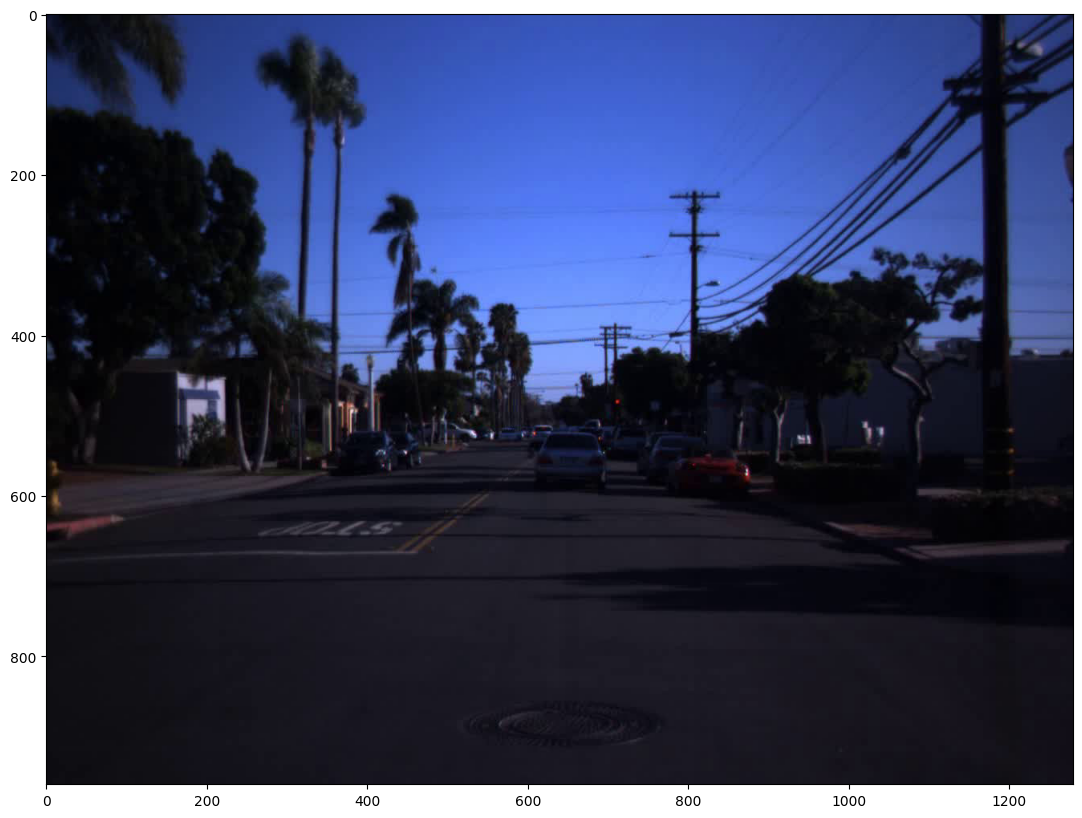

In [14]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread(df.iloc[0, 0])
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

{'class_name': 'stop', 'bndbox_coor': (706, 478, 718, 500)}


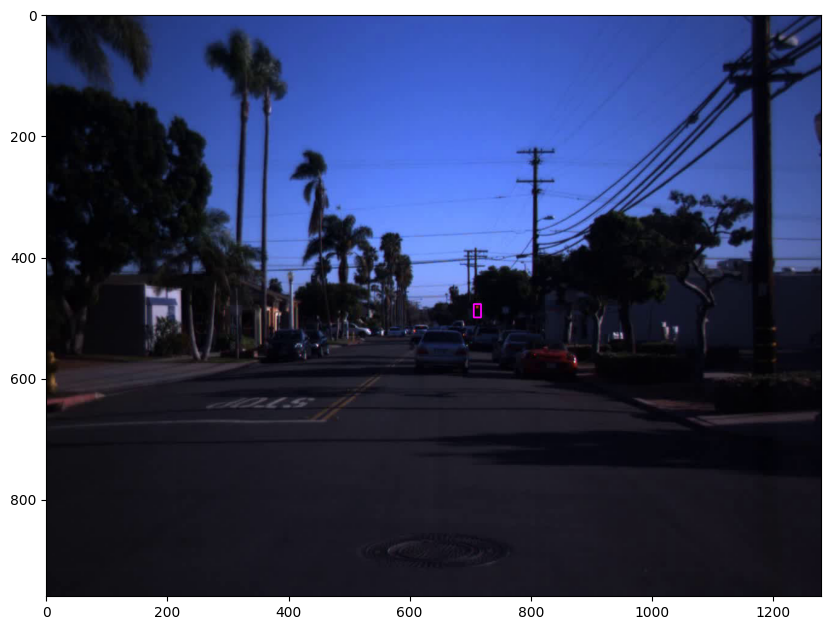

In [15]:
import os
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
img_dir = df.iloc[0, 0]
# xml_file = "./face-mask-detection/annotations/maksssksksss0.xml"

class2color = {'go':(255, 255, 0), 'stop':(255, 0, 255)}



img_path = img_dir = df.iloc[0, 0]
# img_full_path = os.path.join(img_dir, img_path)
img = cv2.imread(img_path)
dst = img.copy()




box = df.iloc[0, 1]
x1 = df.iloc[0, 2]
y1 = df.iloc[0, 3]
x2 = df.iloc[0, 4]
y2 = df.iloc[0, 5]

bndbox_coor = (x1, y1, x2, y2)
class_name = df.iloc[0, 1]

cv2.rectangle(dst, (x1, y1), (x2, y2), color=class2color[class_name], thickness=2)
cv2.putText(dst, class_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 0), thickness=1 )

object_dict = {'class_name' : class_name, 'bndbox_coor' : bndbox_coor}

print(object_dict)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

### Config 파일 수정하기
- 아래 주어진 config 파일은 COCO dataset 기준으로 Faster R-CNN 을 훈련 시키는 설정이므로 FaceMask Dataset 에 맞게 수정해야 함

In [32]:
from mmcv import Config
cfg = Config.fromfile('./configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_w

### Pretrained 모델 다운로드하기

In [47]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints
!wget -c https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth \
      -O checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2023-05-18 00:50:28--  https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.25.82.207, 8.25.82.209, 8.25.82.208, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.25.82.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

checkpoints/faster_ 100%[===================>] 159.54M  13.7MB/s    in 12s     

2023-05-18 00:50:41 (13.0 MB/s) - ‘checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



### Config에서 설정한 LISA Traffic Light Dataset 적용
- build_dataset() 가 호출될 때 MMDetection Framework에서 LisaDataset 클래스 객체를 생성
- load_annotations() 함수가 호출될 때 self.ann_file, self.data_root, self.img_prefix 값이 Config에서 설정한 파일들로 적용되어 있음
- 아래 주어진 config 파일은 COCO dataset 기준으로 Faster R-CNN 을 훈련 시키는 설정이므로 LISA Traffic Light Dataset 에 맞게 수정해야 함

In [ ]:
# cfg.data.train.pipeline

In [ ]:
#트레인대신 밸리드로 돌릴거면 이렇게 하면 된다.
# cfg.data.val.pipeline=cfg.data.train.pipeline 얘로 

In [35]:
%pwd

'/kaggle/working/mmdetection'

In [36]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'LisaDataset'
cfg.data_root = ''

cfg.data.test.type = 'LisaDataset'
cfg.data.test.data_root = ''
cfg.data.test.ann_file = 'test_df.csv'
cfg.data.test.img_prefix = ''

cfg.data.train.type = 'LisaDataset'
cfg.data.train.data_root = ''
cfg.data.train.ann_file = 'train_df.csv'
cfg.data.train.img_prefix = ''

cfg.data.val.type = 'LisaDataset'
cfg.data.val.data_root = ''
cfg.data.val.ann_file = 'train_df.csv'
cfg.data.val.img_prefix = ''

# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 4
# If we need to finetune a model based on a pre-trained detector, we need to
# use load_from to set the path of checkpoints.
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# Set up working dir to save files and logs.
cfg.work_dir = '/kaggle/working/'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02/8
# cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# max epochs 12 
cfg.runner.max_epochs = 2 # 기본값 변경시에만 설정

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
# samples_per_gpu 2 
# cfg.data.samples_per_gpu = 2 # 기본값 변경시에만설정


# CocoDataset의 경우 metric을 bbox로 설정해야 함.(mAP아님. bbox로 설정하면 mAP를 iou threshold를 0.5 ~ 0.95까지 변경하면서 측정)
# Change the evaluation metric since we use customized dataset.
# cfg.evaluation.metric = 'bbox' 
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.device = 'cuda'
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_w

### Config에서 설정한 모델 적용

In [41]:
from mmdet.datasets import build_dataset

%time train_dataset, test_dataset = [build_dataset(cfg.data.train), build_dataset(cfg.data.test)]

/tmp/ipykernel_31/3632903550.py:65: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels=np.array(gt_labels, dtype=np.long),
/tmp/ipykernel_31/3632903550.py:68: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `n

CPU times: user 7min 10s, sys: 2.66 s, total: 7min 13s
Wall time: 7min 27s


/kaggle/working/mmdetection/mmdet/datasets/custom.py:181: UserWarning: CustomDataset does not support filtering empty gt images.
  warnings.warn(


In [ ]:
# from mmdet.datasets import build_dataset

# train_dataset, test_dataset = [build_dataset(cfg.data.val), build_dataset(cfg.data.test)]
# #얘는 바로 안 먹힐 가는성이 노픔


In [42]:
train_dataset # 51826 -> 10395 -> 20730


LisaDataset Train dataset with number of images 20730, and instance counts: 
+-----------------+-------+----------+-------+--------------+-------+-------------+-------+------------+-------+
| category        | count | category | count | category     | count | category    | count | category   | count |
+-----------------+-------+----------+-------+--------------+-------+-------------+-------+------------+-------+
| 0 [go]          | 9178  | 1 [stop] | 10436 | 2 [stopLeft] | 0     | 3 [warning] | 622   | 4 [goLeft] | 494   |
|                 |       |          |       |              |       |             |       |            |       |
| 5 [warningLeft] | 0     |          |       |              |       |             |       |            |       |
+-----------------+-------+----------+-------+--------------+-------+-------------+-------+------------+-------+

In [43]:
test_dataset # 32135 -> 6238 -> 12494


LisaDataset Train dataset with number of images 12494, and instance counts: 
+-----------------+-------+----------+-------+--------------+-------+-------------+-------+------------+-------+
| category        | count | category | count | category     | count | category    | count | category   | count |
+-----------------+-------+----------+-------+--------------+-------+-------------+-------+------------+-------+
| 0 [go]          | 4804  | 1 [stop] | 7235  | 2 [stopLeft] | 0     | 3 [warning] | 193   | 4 [goLeft] | 262   |
|                 |       |          |       |              |       |             |       |            |       |
| 5 [warningLeft] | 0     |          |       |              |       |             |       |            |       |
+-----------------+-------+----------+-------+--------------+-------+-------------+-------+------------+-------+

### Config에서 설정한 모델 생성


In [44]:
from mmdet.models import build_detector

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = train_dataset.CLASSES

### 학습 수행

In [ ]:
from mmdet.apis import train_detector

# Create work_dir
mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))
train_detector(model, train_dataset, cfg, distributed=False, validate=True)

2023-05-18 00:50:52,952 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
/tmp/ipykernel_31/3632903550.py:65: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels=np.array(gt_labels, dtype=np.long),
/tmp/ipykernel_31/3632903550.py:68: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the

In [121]:
df=pd.read_csv('./lisa-traffic-light-dataset/train_df.csv', header=None)

In [131]:
df.iloc[2, 0]

'./lisa-traffic-light-dataset/dayTrain/dayTrain/dayClip7/frames/dayClip7--01382.jpg'

In [29]:
torch.save(model.state_dict(), 'last_checkpoint.pth')

In [28]:
import torch

### 학습된 모델로 예측하기

In [16]:
test_df = pd.read_csv('/kaggle/working/mmdetection/test_df.csv', header = None)
test_df.head()

,0,1,2,3,4,5,6,7
0,/kaggle/input/lisa-traffic-light-dataset/daySe...,stop,642,316,660,352,222,0
1,/kaggle/input/lisa-traffic-light-dataset/daySe...,stop,774,378,786,396,225,0
2,/kaggle/input/lisa-traffic-light-dataset/daySe...,stop,641,322,653,340,227,0
3,/kaggle/input/lisa-traffic-light-dataset/daySe...,stop,641,322,653,340,227,0
4,/kaggle/input/lisa-traffic-light-dataset/daySe...,stop,771,369,786,396,230,0


checkpoint_file = '/kaggle/input/4th-lisa-pth/last_checkpoint.pth'

model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.4)

**이미지 여러장 예측**

In [ ]:
len(test_imgs), test_imgs[0].shape

In [ ]:
for i in range(10):
    result = inference_detector(model_ckpt, test_imgs[i])
    show_result_pyplot(model_ckpt, test_imgs[i], result, score_thr=0.4)

### 모델 평가

In [ ]:
from mmdet.datasets import build_dataloader, build_dataset

data_loader = build_dataloader(
        test_dataset,
        samples_per_gpu=1, #cfg.data.samples_per_gpu,
        workers_per_gpu=cfg.data.workers_per_gpu,
        dist=False,
        shuffle=False)

next(iter(data_loader))

In [ ]:
!mkdir show_test_output

In [ ]:
from mmdet.apis import single_gpu_test
from mmdet.utils import build_dp

# 위에서 만든 /content/show_test_output 디렉토리에 예측 이미지가 저장됨. 
model_ckpt = build_dp(model_ckpt, cfg.device, device_ids=cfg.gpu_ids)
results = single_gpu_test(model_ckpt, data_loader, True, '/content/show_test_output', 0.4)

In [ ]:
metric = test_dataset.evaluate(results, metric='bbox')
metric

In [ ]:
# bbox_mAP: 0.5249, bbox_mAP_50: 0.7417, bbox_mAP_75: 0.6378, bbox_mAP_s: 0.3647, bbox_mAP_m: 0.6660, bbox_mAP_l: 0.8605, bbox_mAP_copypaste: 0.5249 0.7417 0.6378 0.3647 0.6660 0.8605